# 타이타닉

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

In [5]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
titanic_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
titanic_df.Cabin.value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [8]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [9]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]

In [10]:
titanic_df.Cabin.head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [11]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

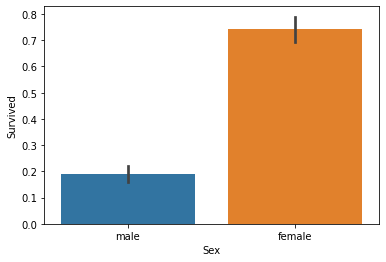

In [12]:
sns.barplot(x='Sex',y='Survived',data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

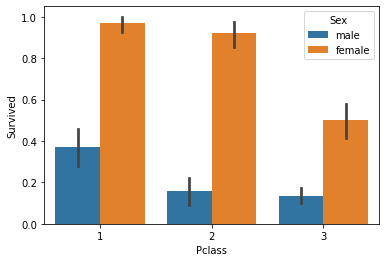

In [13]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data = titanic_df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

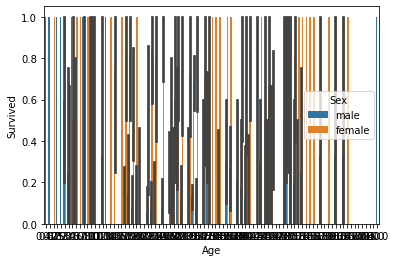

In [14]:
sns.barplot(x='Age',y='Survived',hue='Sex',data = titanic_df)

In [15]:
def get_category(age):
    cat =''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

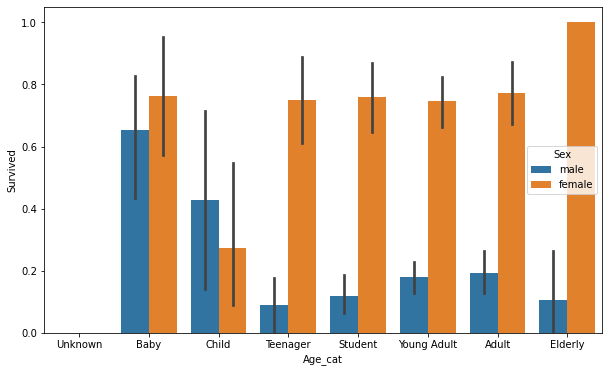

In [16]:
plt.figure(figsize=(10,6))

group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
def encode_features(dataDf):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        dataDf[feature] = LabelEncoder().fit_transform(dataDf[feature])
    return dataDf

In [19]:
titanic_df = encode_features(titanic_df)
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [20]:
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
    return df

def format_features(df):
    df.Cabin = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        df[feature] = LabelEncoder().fit_transform(df[feature])
    return df

def transform_feafures(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop(columns=['Survived'])
X_titanic_df = transform_feafures(X_titanic_df)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,
                                                y_titanic_df,
                                                test_size=0.2,
                                                random_state=11)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [25]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [26]:
dt_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
lr_clf.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
dt_pred =  dt_clf.predict(X_test)
rf_pred =  rf_clf.predict(X_test)
lr_pred =  lr_clf.predict(X_test)

In [28]:
print('dt',accuracy_score(y_test,dt_pred))
print('rf',accuracy_score(y_test,rf_pred))
print('lr',accuracy_score(y_test,lr_pred))

dt 0.7877094972067039
rf 0.8547486033519553
lr 0.8491620111731844


In [29]:
from sklearn.model_selection import KFold

In [32]:
def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f'교차검증 {iter_count} 정확도 : {accuracy:.4f}')
        
    mean_score = np.mean(scores)
    print(f'평균정확도 : {mean_score:.4f}')

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균정확도 : 0.7823


In [35]:
exec_kfold(dt_clf,folds=5) # dt 0.7877094972067039
# 교차 검증 0 정확도 : 0.7430
# 교차 검증 1 정확도 : 0.7753
# 교차 검증 2 정확도 : 0.7921
# 교차 검증 3 정확도 : 0.7865
# 교차 검증 4 정확도 : 0.8427
# 평균 정확도:0.7879

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균정확도 : 0.7823


In [54]:
exec_kfold(rf_clf,folds=5) # rf 0.8547486033519553
# 교차 검증 0 정확도 : 0.7933
# 교차 검증 1 정확도 : 0.7978
# 교차 검증 2 정확도 : 0.8483
# 교차 검증 3 정확도 : 0.7640
# 교차 검증 4 정확도 : 0.8652
# 평균 정확도:0.8137

교차검증 0 정확도 : 0.7933
교차검증 1 정확도 : 0.8090
교차검증 2 정확도 : 0.8371
교차검증 3 정확도 : 0.7753
교차검증 4 정확도 : 0.8596
평균정확도 : 0.8148


In [37]:
exec_kfold(lr_clf,folds=5) # lr 0.8491620111731844
# 교차 검증 0 정확도 : 0.7989
# 교차 검증 1 정확도 : 0.7697
# 교차 검증 2 정확도 : 0.7809
# 교차 검증 3 정확도 : 0.7753
# 교차 검증 4 정확도 : 0.8146
# 평균 정확도:0.7879

교차검증 0 정확도 : 0.8045
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7753
교차검증 3 정확도 : 0.7584
교차검증 4 정확도 : 0.8371
평균정확도 : 0.7912


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [38]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count} 정확도 : {accuracy:.4f}')

print(f'평균 정확도:{np.mean(scores):.4f}')

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도:0.7879


In [52]:
scores = cross_val_score(rf_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count} 정확도 : {accuracy:.4f}')

print(f'평균 정확도:{np.mean(scores):.4f}')

교차 검증 0 정확도 : 0.7933
교차 검증 1 정확도 : 0.7978
교차 검증 2 정확도 : 0.8483
교차 검증 3 정확도 : 0.7640
교차 검증 4 정확도 : 0.8652
평균 정확도:0.8137


In [59]:
scores = cross_val_score(lr_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count} 정확도 : {accuracy:.4f}')

print(f'평균 정확도:{np.mean(scores):.4f}')

교차 검증 0 정확도 : 0.7989
교차 검증 1 정확도 : 0.7697
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7753
교차 검증 4 정확도 : 0.8146
평균 정확도:0.7879


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [60]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters = {
    'max_depth' : [2,3,5,10],
    'min_samples_split':[2,3,5],
    'min_samples_leaf':[1,5,8]
}

In [63]:
grid_dclf = GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

In [66]:
grid_dclf.cv_results_

{'mean_fit_time': array([0.00199447, 0.00179491, 0.00139551, 0.00159578, 0.00139618,
        0.00159678, 0.00080085, 0.        , 0.        , 0.00312433,
        0.00312438, 0.        , 0.        , 0.        , 0.00312448,
        0.0031239 , 0.00312428, 0.00312672, 0.0004045 , 0.00159349,
        0.00199728, 0.00139914, 0.        , 0.        , 0.00312433,
        0.        , 0.00312428, 0.00311909, 0.00501313, 0.        ,
        0.        , 0.00312471, 0.00312386, 0.00312443, 0.        ,
        0.00312428]),
 'std_fit_time': array([1.06196677e-06, 3.99041329e-04, 4.87509211e-04, 4.88558319e-04,
        4.88519285e-04, 4.87528781e-04, 9.80835142e-04, 0.00000000e+00,
        0.00000000e+00, 6.24866486e-03, 6.24876022e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.24895096e-03, 6.24780655e-03,
        6.24856949e-03, 6.25343323e-03, 8.09001923e-04, 4.89908298e-04,
        2.42859489e-06, 4.85836405e-04, 0.00000000e+00, 0.00000000e+00,
        6.24866486e-03, 0.00000000e+0

In [67]:
grid_dclf.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [68]:
grid_dclf.best_score_

0.7991825076332119

In [70]:
best_dclf = grid_dclf.best_estimator_

In [71]:
dpred = best_dclf.predict(X_test)

In [72]:
accuracy_score(y_test,dpred)

0.8715083798882681